In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats
import seaborn as sns
from scipy.stats import linregress

In [2]:
#os.chdir('/home/charly/Lab/Projects/uJ/local/experiments/HT-Sine2hr/')

In [2]:
pwd()

'/home/esb/Projects/uJ/local/experiments/HT-LB'

In [31]:
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')
from DataManagers import *
from DataStructs import *
from AnalysisFunctions import *
from PlottingFunctions import *


# Analyze experiment

### Experiment Parameters

In [4]:

rootDir="../../data_sample/HT-LB/"
expeLabel="HT-LB"
trap_list="xy02,xy03,xy04,xy05,xy06,xy10".split(",")  
trap_list="xy03,xy03-1".split(",")  


### Import lineages from file

In [18]:
trap_df_lineages=[]
for i,trap in enumerate(trap_list):
    
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    lineagesDataFile='%s%s_%s_lineages_analysis.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    lineagesDataFile='%s%s_%s_lineages_all.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages=load_data_lineages(lineagesDataFile)
    trap_df_lineages.append(df_lineages)
    list_frames=df_lineages.frame.unique()

Loading 168 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03_lineages_all.csv
Loading 15 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03-1_lineages_all.csv


### Plot distributions

In [20]:
min_timeToDivision=0 #To remove segmentation errors 

timeToDivisions=[]
meanGFPs=[]
meanDsReds=[]
meanRelInts=[]
for this_trackID in trackIDs:
    this_lineage=df_lineages.loc[df_lineages['trackID'] == this_trackID]
    frame_divisions=this_lineage.loc[this_lineage['division']==1]['frame']
    
    for i, idivisions in enumerate(frame_divisions.index[0:-1]):
        this_meanGFP=np.mean(df_lineages['GFP'][frame_divisions.index[i]:frame_divisions.index[i+1]])
        this_meanDsRed=np.mean(df_lineages['DsRed'][frame_divisions.index[i]:frame_divisions.index[i+1]])
        this_meanRelInt=np.mean(df_lineages['RelInt'][frame_divisions.index[i]:frame_divisions.index[i+1]])
        #if np.isnan(this_meanGFP):
        ##    print(i)
        #    print(this_lineage['GFP'][frame_divisions.values[i]:frame_divisions.values[i+1]])
        #    print("%s: Mean GFP in [%s,%s] = %s"%(i, frame_divisions.index[i],frame_divisions.index[i+1], this_meanGFP))
        
        if min_timeToDivision<(frame_divisions.values[i+1]-frame_divisions.values[i]):
            meanGFPs.append(this_meanGFP)
            meanDsReds.append(this_meanDsRed)
            meanRelInts.append(this_meanRelInt)
            timeToDivisions.append(frame_divisions.values[i+1]-frame_divisions.values[i])



NameError: name 'trackIDs' is not defined

GFP:
R^2= 0.02743542236005656
pvalue= 1.0168123740792941e-23
stderr= 0.0010757461735226063

DsRed:
R^2= 0.049924437432104556
pvalue= 2.942202294348721e-42
stderr= 0.0026415155057441177


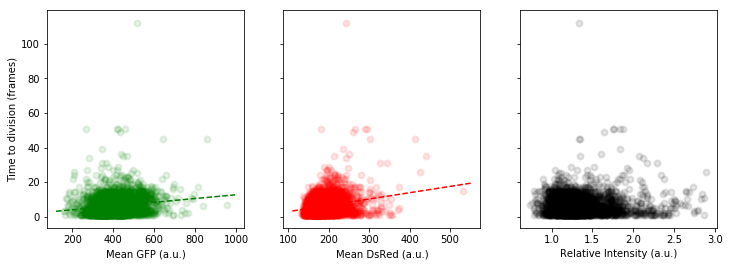

In [13]:
from scipy.stats import linregress

#print("Division events: %s"%frame_divisions.values)

#Compute mean flurescence between division

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

#ax[0].plot(meanGFPs, bGFP + mGFP * meanGFPs, '-k')
lregGFP=linregress(meanGFPs,timeToDivisions)
print('GFP:\nR^2=',lregGFP.rvalue**2)
print('pvalue=',lregGFP.pvalue)
print('stderr=',lregGFP.stderr)
ax[0].scatter(meanGFPs,timeToDivisions, color='g', alpha=.1, linewidth=2)

#ax[0].plot([0,np.max(meanGFPs)], [lregGFP.intercept, lregGFP.intercept + lregGFP.slope*np.max(meanGFPs)], 'g', label='fitted line')
x_vals = np.array(ax[0].get_xlim())
y_vals = lregGFP.intercept + lregGFP.slope * x_vals
ax[0].plot(x_vals, y_vals, '--g')
ax[0].set_xlabel('Mean GFP (a.u.)',)
ax[0].set_ylabel('Time to division (frames)')

lregDsRed=linregress(meanDsReds,timeToDivisions)
print('\nDsRed:\nR^2=',lregDsRed.rvalue**2)
print('pvalue=',lregDsRed.pvalue)
print('stderr=',lregDsRed.stderr)
ax[1].scatter(meanDsReds,timeToDivisions, color='r', alpha=.1, linewidth=2)
x_vals = np.array(ax[1].get_xlim())
y_vals = lregDsRed.intercept + lregDsRed.slope * x_vals
ax[1].plot(x_vals, y_vals, '--r')
ax[1].set_xlabel('Mean DsRed (a.u.)',)

ax[2].scatter(meanRelInts,timeToDivisions, color='k', alpha=.1, linewidth=2)
ax[2].set_xlabel('Relative Intensity (a.u.)',)

plt.show()

/home/charly/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


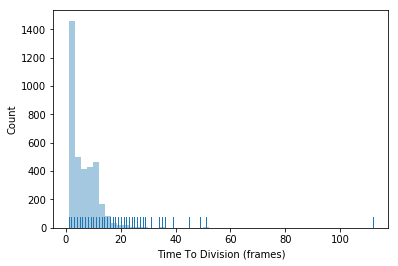

In [14]:

sns.distplot(timeToDivisions, kde=False, rug=True);
plt.xlabel('Time To Division (frames)')
plt.ylabel('Count')
plt.show()

lineageID      int64
trackID       object
cellID       float64
motherID     float64
frame          int64
length       float64
division       int64
GFP          float64
DsRed        float64
RelInt       float64
AbsInt       float64
dtype: object

In [11]:
this_trackID="0.143-115.0"
this_lineage=df_lineages[df_lineages['trackID'] == this_trackID]
frame_divisions=this_lineage[this_lineage['division']==1]['frame']
print(frame_divisions)
print(frame_divisions.diff()[0:] )


9        9
14      14
17      17
32      32
43      43
62      62
70      70
75      75
78      78
80      80
88      88
93      93
98      98
107    107
109    109
Name: frame, dtype: int64
9       NaN
14      5.0
17      3.0
32     15.0
43     11.0
62     19.0
70      8.0
75      5.0
78      3.0
80      2.0
88      8.0
93      5.0
98      5.0
107     9.0
109     2.0
Name: frame, dtype: float64


In [15]:
min_frame=37
min_frame=1
meanTimeToDivisions=[]
iniGFPs=[]
iniDsReds=[]
iniRelInts=[]
for this_trackID in trackIDs:
    this_lineage=df_lineages.loc[df_lineages['trackID'] == this_trackID]
    frame_divisions=this_lineage.loc[this_lineage['division']==1]['frame']
    
    if len(frame_divisions)>1:
        if frame_divisions.index[0]>min_frame:
            meanTimeToDivisions.append(np.mean(frame_divisions.diff()[0:]))

            iniGFPs.append(np.mean(df_lineages['GFP'][frame_divisions.index[0]]))
            iniDsReds.append(np.mean(df_lineages['DsRed'][frame_divisions.index[0]]))
            iniRelInts.append(np.mean(df_lineages['RelInt'][frame_divisions.index[0]]))
    
print(len(iniGFPs))
print(len(meanTimeToDivisions))

1209
1209


GFP:
R^2= 0.04001243196494657
pvalue= 2.23339548694417e-12
stderr= 0.0017591845617817067

DsRed:
R^2= 0.03269135311381721
pvalue= 2.411309581915555e-10
stderr= 0.0047120240989075475


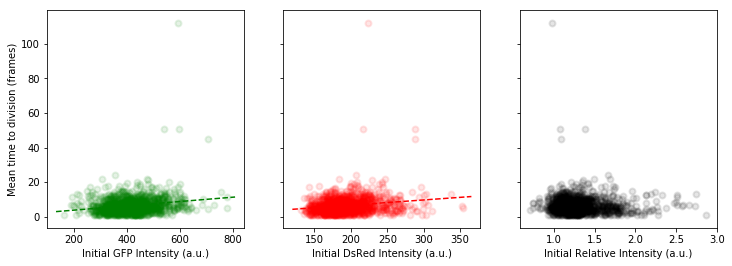

In [16]:

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

#ax[0].plot(meanGFPs, bGFP + mGFP * meanGFPs, '-k')
lregGFP=linregress(iniGFPs,meanTimeToDivisions)
print('GFP:\nR^2=',lregGFP.rvalue**2)
print('pvalue=',lregGFP.pvalue)
print('stderr=',lregGFP.stderr)
ax[0].scatter(iniGFPs,meanTimeToDivisions, color='g', alpha=.1, linewidth=2)

#ax[0].plot([0,np.max(meanGFPs)], [lregGFP.intercept, lregGFP.intercept + lregGFP.slope*np.max(meanGFPs)], 'g', label='fitted line')
x_vals = np.array(ax[0].get_xlim())
y_vals = lregGFP.intercept + lregGFP.slope * x_vals
ax[0].plot(x_vals, y_vals, '--g')
ax[0].set_xlabel('Initial GFP Intensity (a.u.)',)
ax[0].set_ylabel('Mean time to division (frames)')

lregDsRed=linregress(iniDsReds,meanTimeToDivisions)
print('\nDsRed:\nR^2=',lregDsRed.rvalue**2)
print('pvalue=',lregDsRed.pvalue)
print('stderr=',lregDsRed.stderr)
ax[1].scatter(iniDsReds,meanTimeToDivisions, color='r', alpha=.1, linewidth=2)
x_vals = np.array(ax[1].get_xlim())
y_vals = lregDsRed.intercept + lregDsRed.slope * x_vals
ax[1].plot(x_vals, y_vals, '--r')
ax[1].set_xlabel('Initial DsRed Intensity (a.u.)',)

ax[2].scatter(iniRelInts,meanTimeToDivisions, color='k', alpha=.1, linewidth=2)
ax[2].set_xlabel('Initial Relative Intensity (a.u.)',)

plt.show()

In [ ]:
frames

In [17]:

division_rate=[]
for this_frame in frames:

    this_cells=df_lineages.loc[df_lineages['frame']==this_frame]['division']
    num_cells=len(this_cells)
    num_divisions=np.where(this_cells == 1)[0].size
    division_rate.append(num_divisions/num_cells)
    print('Frame=%s, num_cells=%s, num_divisions=%s, division_rate=%s'%(this_frame, num_cells, num_divisions, num_divisions/num_cells))

Frame=1, num_cells=608, num_divisions=89, division_rate=0.14638157894736842
Frame=2, num_cells=617, num_divisions=125, division_rate=0.2025931928687196
Frame=3, num_cells=609, num_divisions=88, division_rate=0.1444991789819376
Frame=4, num_cells=597, num_divisions=76, division_rate=0.1273031825795645
Frame=5, num_cells=591, num_divisions=100, division_rate=0.1692047377326565
Frame=6, num_cells=600, num_divisions=105, division_rate=0.175
Frame=7, num_cells=610, num_divisions=102, division_rate=0.16721311475409836
Frame=8, num_cells=601, num_divisions=91, division_rate=0.15141430948419302
Frame=9, num_cells=594, num_divisions=103, division_rate=0.1734006734006734
Frame=10, num_cells=585, num_divisions=56, division_rate=0.09572649572649573
Frame=11, num_cells=570, num_divisions=100, division_rate=0.17543859649122806
Frame=12, num_cells=584, num_divisions=114, division_rate=0.1952054794520548
Frame=13, num_cells=578, num_divisions=92, division_rate=0.15916955017301038
Frame=14, num_cells=5

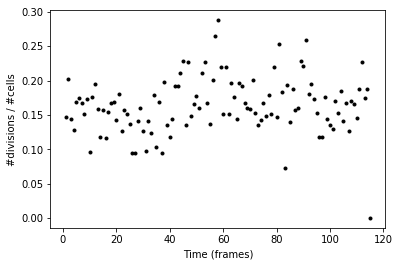

In [18]:
plt.plot(frames, division_rate,'k.')
plt.xlabel('Time (frames)')
plt.ylabel('#divisions / #cells')
plt.show()

In [19]:

GFPs=[]
DsReds=[]
RelInts=[]
divisionss=[]
for this_trackID in trackIDs:
    this_lineage=df_lineages.loc[df_lineages['trackID'] == this_trackID]
    lineage_divisions=this_lineage.loc[this_lineage['division']==1]['frame']
    
    if len(lineage_divisions)>1:
        lineage_relInts=this_lineage.loc[this_lineage['division']==1]['RelInt']
        lineage_DsReds=this_lineage.loc[this_lineage['division']==1]['DsRed']
        lineage_GFPs=this_lineage.loc[this_lineage['division']==1]['GFP']
        RelInts.append(np.array(lineage_relInts))
        DsReds.append(np.array(lineage_DsReds))
        GFPs.append(np.array(lineage_GFPs))
        divisionss.append(np.array(lineage_divisions))        
            
print(len(RelInts))
print(len(divisionss))

1209
1209


LinregressResult(slope=0.0009007857454700133, intercept=1.2769386569500705, rvalue=0.09933970209004299, pvalue=4.426583743914167e-12, stderr=0.00012978865145665697)
LinregressResult(slope=-0.36466895021516754, intercept=209.68787642800106, rvalue=-0.35115386717158037, pvalue=2.525300667339357e-140, stderr=0.013986730223157601)
LinregressResult(slope=-1.0100845080860201, intercept=459.6772311917067, rvalue=-0.3877077736211996, pvalue=3.3095994247109576e-173, stderr=0.03454404472845494)


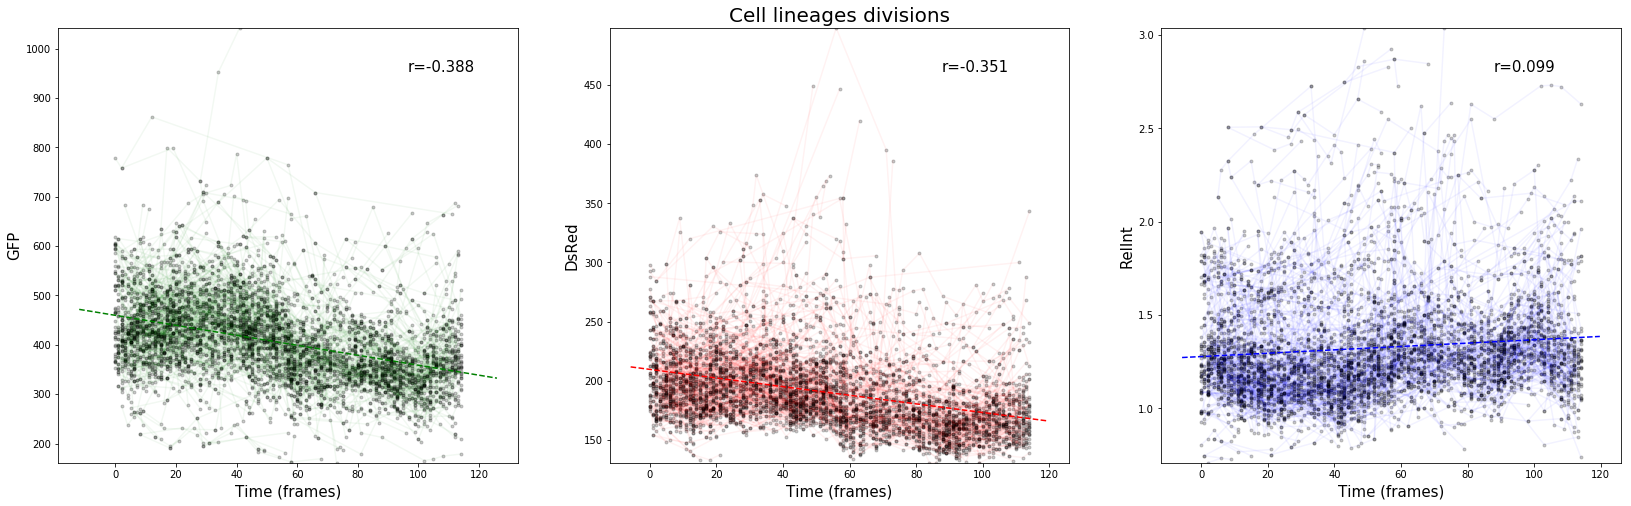

In [20]:
fig, ax = plt.subplots(1, 3,  figsize=(28,8))
#sharey=True,

linregX=[]
linreg_relIntY=[]
linreg_DsRedY=[]
linreg_GFPY=[]
for i in range(len(divisionss)):
    ax[2].plot(divisionss[i], RelInts[i],'k.',alpha=0.2)
    ax[2].plot(divisionss[i], RelInts[i],'b-',alpha=0.05)
    ax[1].plot(divisionss[i], DsReds[i],'k.',alpha=0.2)
    ax[1].plot(divisionss[i], DsReds[i],'r-',alpha=0.05)
    ax[0].plot(divisionss[i], GFPs[i],'k.',alpha=0.2)
    ax[0].plot(divisionss[i], GFPs[i],'g-',alpha=0.05)
    
    linregX+=divisionss[i].tolist()
    linreg_relIntY+=RelInts[i].tolist()
    linreg_DsRedY+=DsReds[i].tolist()
    linreg_GFPY+=GFPs[i].tolist()

lrI=linregress(linregX,linreg_relIntY)
lrR=linregress(linregX,linreg_DsRedY)
lrG=linregress(linregX,linreg_GFPY)
print(lrI)
print(lrR)
print(lrG)
x_vals = np.array(ax[0].get_xlim())
y_vals = lrI.intercept + lrI.slope * x_vals
ax[2].plot(x_vals, y_vals, '--b')
ax[2].set_ylim(min(linreg_relIntY),max(linreg_relIntY))

posyI=((max(linreg_relIntY)-min(linreg_relIntY))*9/10)+min(linreg_relIntY)
posxI=(x_vals[-1]-x_vals[0])*7/10

txt=round(lrI.rvalue,3)
ax[2].text(posxI,posyI,"r=%s"%(txt),fontsize=15)




x_vals = np.array(ax[1].get_xlim())
y_vals = lrR.intercept + lrR.slope * x_vals
ax[1].plot(x_vals, y_vals, '--r')
ax[1].set_ylim(min(linreg_DsRedY),max(linreg_DsRedY))

posyI=((max(linreg_DsRedY)-min(linreg_DsRedY))*9/10)+min(linreg_DsRedY)
posxI=(x_vals[-1]-x_vals[0])*7/10

txt=round(lrR.rvalue,3)
ax[1].text(posxI,posyI,"r=%s"%(txt),fontsize=15)


x_vals = np.array(ax[2].get_xlim())
y_vals = lrG.intercept + lrG.slope * x_vals
ax[0].plot(x_vals, y_vals, '--g')
ax[0].set_ylim(min(linreg_GFPY),max(linreg_GFPY))

posyI=((max(linreg_GFPY)-min(linreg_GFPY))*9/10)+min(linreg_GFPY)
posxI=(x_vals[-1]-x_vals[0])*7/10

txt=round(lrG.rvalue,3)
ax[0].text(posxI,posyI,"r=%s"%(txt),fontsize=15)




ax[0].set_xlabel('Time (frames)',fontsize=15)
ax[1].set_xlabel('Time (frames)',fontsize=15)
ax[2].set_xlabel('Time (frames)',fontsize=15)
ax[2].set_ylabel('RelInt',fontsize=15)
ax[1].set_ylabel('DsRed',fontsize=15)
ax[0].set_ylabel('GFP',fontsize=15)
ax[1].set_title("Cell lineages divisions",fontsize=20)

figname=rootDir+"/figures/%s_lineage_divisions.pdf"%(expeLabel)
plt.savefig(figname)

plt.show()